<a href="https://colab.research.google.com/github/Edgar-IAH/MNIST/blob/main/MNIST_Practice_1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_recall_fscore_support,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import SCORERS



In [ ]:
digits = load_digits()
print('digits __class__: ',digits.__class__)
print('digits len: ',len(digits))
print('digits __dict__: ',digits.__dict__)


digits __class__:  <class 'sklearn.utils.Bunch'>
digits len:  7
digits __dict__:  {}


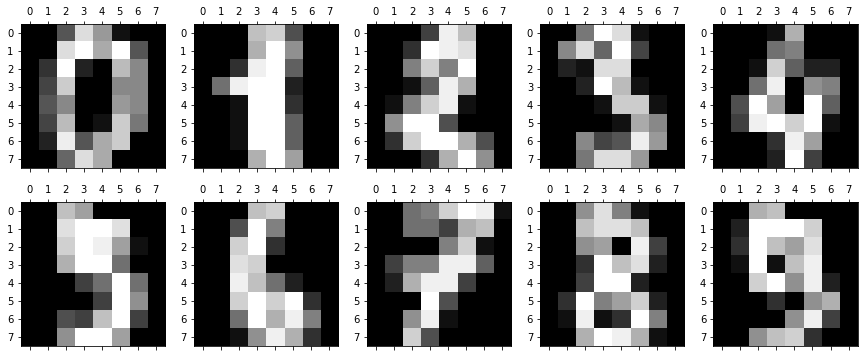

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(15,6))



for i in range(10):
  plt.gray()
  plt.subplot(2, 5, i+1)
  plt.matshow(digits.images[i],fignum=False)

plt.show()


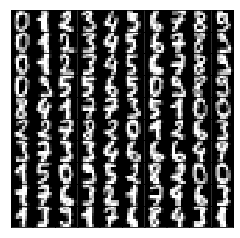

In [ ]:


fig, axes = plt.subplots(2, 5, figsize=(4,4))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(100):
  plt.gray()
  plt.subplot(10, 10, i+1)
  #plt.xticks([])
  #plt.yticks([])
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)
  plt.matshow(digits.images[i],fignum=False)

plt.show()



Aplanar y poner en dataframe X y Y

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(1437, 64)
(1437,)
(360, 64)
(360,)


In [ ]:
pd.DataFrame(y).describe()

,target
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


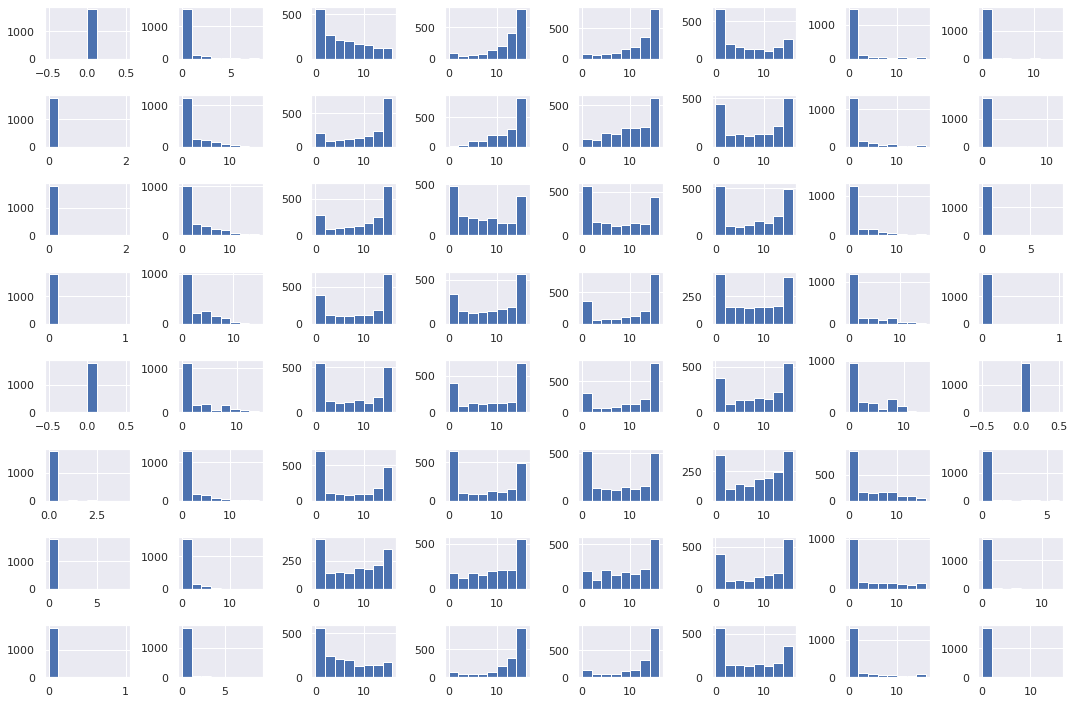

In [ ]:
# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(8, 8)

# Espacio entre gráficas
plt.tight_layout()

# Grafica los histogramas uno por uno
for k in range(64):
    plt.subplot(8, 8, k + 1)
    # Número de valores diferentes.
    buckets = 8
    # Crea el histograma
    X.iloc[:, k].hist(bins=buckets)
# Despliega la figura con las gráficas
plt.show()

In [ ]:
def mi_RMSE(y, y_pred):
  return np.sqrt(np.mean((y - y_pred)**2))

def mi_MAE(y, y_pred):
  return np.mean(np.abs(y - y_pred)) 

def mi_MAPE(y, y_pred):
  return np.mean(np.abs((y - y_pred)/y)) * 100

In [ ]:
#X_train, X_test, y_train, y_test

modeloDummy = DummyClassifier(strategy='stratified', random_state=0)

modeloDummy.fit(X_train, y_train)       # entrenamos con los conjuntos de entrenamiento

predictions = modeloDummy.predict(X_train)

print('===============================\nDUMMY REGRESSOR:\n===============================')
print('ENTRENAMIENTO:')
print('Scores:')
print('Accuracy: ', accuracy_score(y_train, predictions))
print('Precision: ', precision_score(y_train, predictions, average=None))
print('Recall: ', recall_score(y_train, predictions, average=None))

predictions = modeloDummy.predict(X_test)
print('VALIDACION:')
print('Scores:')
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average=None))
print('Recall: ', recall_score(y_test, predictions, average=None))



DUMMY REGRESSOR:
ENTRENAMIENTO:
Scores:
Accuracy:  0.10090466249130133
Precision:  [0.07633588 0.09655172 0.0962963  0.0617284  0.10759494 0.1125
 0.13392857 0.13286713 0.0952381  0.10416667]
Recall:  [0.06622517 0.0952381  0.09219858 0.06493506 0.11258278 0.12676056
 0.10948905 0.13571429 0.1037037  0.10791367]
VALIDACION:
Scores:
Accuracy:  0.08888888888888889
Precision:  [0.15555556 0.05405405 0.05714286 0.12820513 0.         0.14285714
 0.13636364 0.         0.11428571 0.1       ]
Recall:  [0.25925926 0.05714286 0.05555556 0.17241379 0.         0.15
 0.06818182 0.         0.1025641  0.07317073]


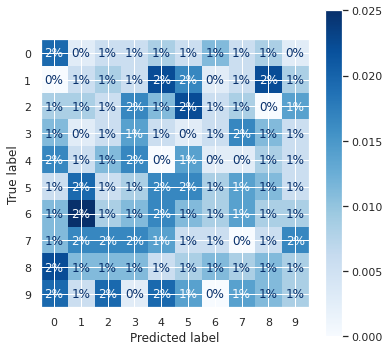

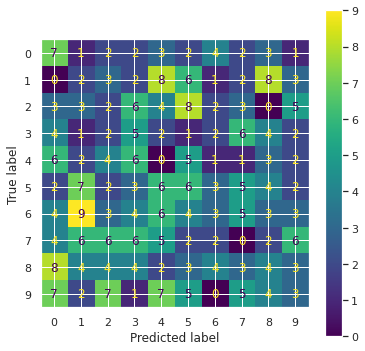

In [ ]:
cm_dummy = confusion_matrix(y_test, predictions)

sns.set(rc={"figure.figsize": (6, 6)})

#fig, axes = plt.subplots(2, 2)
#plt.subplot(2, 2, 1)
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues',  normalize='all', values_format= '.0%')
#plt.subplot(2, 2, 2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_dummy)
disp2.plot()
#plt.subplot(2, 2, 3)
#disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_dummy)
#disp3.plot()

plt.show()

In [ ]:
#model = MLPClassifier(max_iter=5000, hidden_layer_sizes=(15,15)) # Multi-layer perceptron (must increase number of iterations)
model = MLPClassifier()
cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=10) # k-folds cross-validation

# Metrics to evaluate model
metrics = {
    "RMSE": make_scorer(mi_RMSE, greater_is_better=False),
    "MAE": make_scorer(mi_MAE, greater_is_better=False),
    "MAPE": make_scorer(mi_MAPE, greater_is_better=False),
}

# Metrics to evaluate model
metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average = 'micro'),
    'recall': make_scorer(recall_score, average = 'micro'),
}


scores = cross_validate(model, X_train, y_train, scoring=metrics, cv=cv, return_train_score=True, n_jobs=-1)
#scores = cross_validate(model, X_train, y_train, scoring='accuracy', cv=cv, return_train_score=True, n_jobs=-1)

sdf = pd.DataFrame(scores)

sdf.style

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,1.122303,0.010377,0.961057,1.000000,0.961057,1.000000,0.961057,1.000000
1,1.269515,0.006294,0.949861,1.000000,0.949861,1.000000,0.949861,1.000000


In [ ]:
print('ENTRENAMIENTO:')
print('mean accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\n' % (
                                                                      np.mean(scores['train_accuracy']),
                                                                      np.std(scores['train_accuracy']),
                                                                      np.mean(scores['train_precision']),
                                                                      np.std(scores['train_precision']), 
                                                                      np.mean(scores['train_recall']),
                                                                      np.std(scores['train_recall']),
                                                                      ))
    
print('VALIDACION (interna al método de validación cruzada):')
print('mean accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\n' % (
                                                                      np.mean(scores['test_accuracy']),
                                                                      np.std(scores['test_accuracy']),
                                                                      np.mean(scores['test_precision']),
                                                                      np.std(scores['test_precision']), 
                                                                      np.mean(scores['test_recall']),
                                                                      np.std(scores['test_recall']),
                                                                      ))

ENTRENAMIENTO:
mean accuracy: 1.000 (0.0000)
mean precision: 1.000 (0.0000)
mean recall: 1.000 (0.0000)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.955 (0.0056)
mean precision: 0.955 (0.0056)
mean recall: 0.955 (0.0056)



In [ ]:
# Results over test set
print('PRUEBA:')

# Fit best model and test it
model.fit(X_train, y_train) # fit model

predictions = model.predict(X_test) # Compute predictions over test set

print('RMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (
    mi_RMSE(y_test, predictions),
    mi_MAE(y_test, predictions),
    mi_MAPE(y_test, predictions),
))

cm = confusion_matrix(y_test, predictions, labels=range(10))
print(cm)

PRUEBA:
RMSE: 0.813
MAE: 0.117
MAPE: 3.568

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  0  1  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


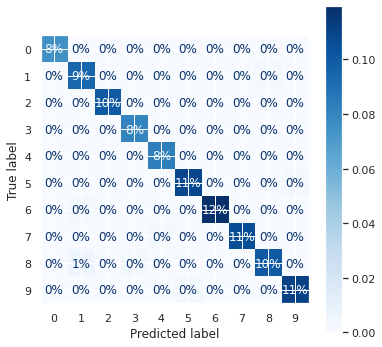

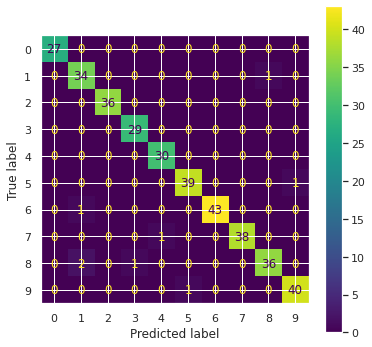

In [ ]:
sns.set(rc={"figure.figsize": (6, 6)})
#fig, axes = plt.subplots(2, 2)
#plt.subplot(2, 2, 1)
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues',  normalize='all', values_format= '.0%')
#plt.subplot(2, 2, 2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2.plot()
#plt.subplot(2, 2, 3)
#disp3 = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp3.plot()

plt.show()

In [ ]:
print(accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions, average=None))
print(recall_score(y_test, predictions, average=None))
print(f1_score(y_test, predictions, average=None))

0.9777777777777777
[1.         0.91891892 1.         0.96666667 0.96774194 0.975
 1.         1.         0.97297297 0.97560976]
[1.         0.97142857 1.         1.         1.         0.975
 0.97727273 0.97435897 0.92307692 0.97560976]
[1.         0.94444444 1.         0.98305085 0.98360656 0.975
 0.98850575 0.98701299 0.94736842 0.97560976]
